# Kurapati Venkatesh
# Topic: Association Rules

# ---------------------------------------------------------------------------

## 2. The Departmental Store, has gathered the data of the products it sells on a Daily basis. Using Association Rules concepts, provide the insights on the rules and the plots.


## -----------------------------------------------------------------------------------

### Business objective: To help the Departmental store gain popularity and increase footfall of customers and provide ways the business can improve exponentially, apply Association Rule Algorithm, explain the rules, and visualize the graphs for clear understanding of solution.

## -------------------------------------------------------------------------------------------

Import libraries:

In [3]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

Load Dataset:

In [4]:
df = pd.read_csv('G:/groceries2.csv', sep=',') 

Print top 5 rows: 

In [5]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Each row of the dataset represents items that were purchased together on the same day at the same store.The dataset is a sparse dataset as relatively high percentage of data is NA or NaN or equivalent.

###### These NaNs make it hard to read the table. Let’s find out how many unique items are actually there in the table.

In [6]:
items = (df['0'].unique())
items

array(['citrus fruit', 'tropical fruit', 'whole milk', 'pip fruit',
       'other vegetables', 'rolls/buns', 'pot plants', 'beef',
       'frankfurter', 'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [7]:
len(items)

158

######  *There are 158 items in total that make up the entire dataset.

### Data Preprocessing: 

To make use of the apriori module given by mlxtend library, we need to convert the dataset according to it’s liking. apriori module requires a dataframe that has either 0 and 1 or True and False as data. The data we have is all string (name of items), we need to One Hot Encode the data.

##### Custom One Hot Encoding: 

In [8]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

### Applying Apriori:

In [38]:
freq_items = apriori(ohe_df, min_support = 0.0075, max_len = 4, use_colnames=True, verbose=1)
freq_items.head(10)

Processing 2272 combinations | Sampling itemset size 43


,support,itemsets
0,0.098526,(shopping bags)
1,0.104931,(tropical fruit)
2,0.015048,(canned fish)
3,0.016268,(herbs)
4,0.052364,(napkins)
5,0.011693,(frozen fish)
6,0.013218,(cake bar)
7,0.010778,(canned vegetables)
8,0.080529,(bottled beer)
9,0.023284,(cat food)


#### Mining Association Rules:

#### Most Frequent item sets based on support:

In [42]:
freq_items.sort_values('support', ascending = False, inplace = True)

<ipython-input-43-d9fe0e183334>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x = list(range(0, 11)), height = freq_items.support[0:11], color ='rgmyk')


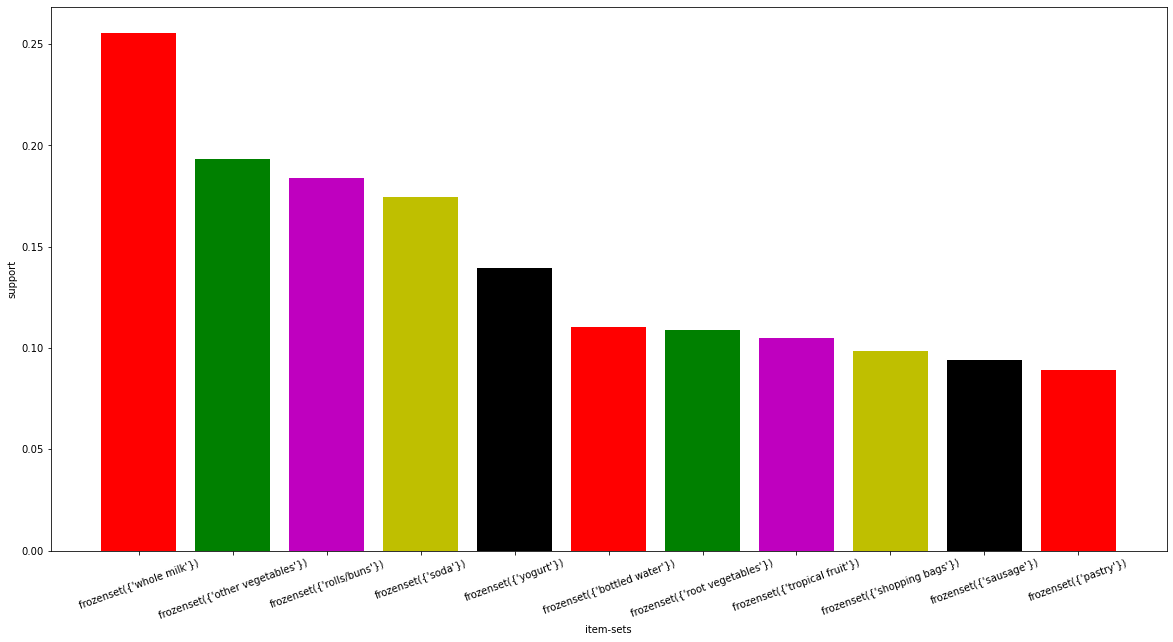

In [43]:
plt.bar(x = list(range(0, 11)), height = freq_items.support[0:11], color ='rgmyk')
plt.xticks(list(range(0, 11)), freq_items.itemsets[0:11], rotation=20)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.rcParams["figure.figsize"]= 20, 10

Whole milk is the highly sold item compared to others.

#### Rules:

In [45]:
rules = association_rules(freq_items, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1161,"(tropical fruit, whole milk)","(yogurt, other vegetables)",0.042298,0.043416,0.007626,0.180288,4.152546,0.005789,1.166976
1156,"(yogurt, other vegetables)","(tropical fruit, whole milk)",0.043416,0.042298,0.007626,0.175644,4.152546,0.005789,1.161758
1069,"(other vegetables, whole milk)","(yogurt, root vegetables)",0.074835,0.025826,0.007829,0.104620,4.050919,0.005896,1.088000
1064,"(yogurt, root vegetables)","(other vegetables, whole milk)",0.025826,0.074835,0.007829,0.303150,4.050919,0.005896,1.327638
788,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
789,(whipped/sour cream),(berries),0.071683,0.033249,0.009049,0.126241,3.796886,0.006666,1.106428
1158,"(yogurt, whole milk)","(other vegetables, tropical fruit)",0.056024,0.035892,0.007626,0.136116,3.792358,0.005615,1.116016
1159,"(other vegetables, tropical fruit)","(yogurt, whole milk)",0.035892,0.056024,0.007626,0.212465,3.792358,0.005615,1.198645
1044,(root vegetables),"(beef, other vegetables)",0.108998,0.019725,0.007931,0.072761,3.688692,0.005781,1.057197
1041,"(beef, other vegetables)",(root vegetables),0.019725,0.108998,0.007931,0.402062,3.688692,0.005781,1.490123


The result of association analysis shows which item is frequently purchased with other items.

## Analysis of Rules:

###### 1.  From the top rules, it is clear that the whole milk is the must purchasable item. The Frequent items bought in the store are whole milk, yogurt, other vegetables and rolls/buns.
###### 2.  The Lift Ratio indicates how likely a transaction will be found where antecedents and consequents, as compared to the entire population of transactions. In other words, the Lift Ratio is the Confidence divided by the value for Support for Consequent. 

### --------------------EXTRA PART-------------------------

In [31]:
def to_list(i):
    return (sorted(list(i)))

In [32]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)
ma_X = ma_X.apply(sorted)
rules_sets = list(ma_X)

In [33]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [34]:
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

#### Getting rules without any redudancy: 

In [35]:
rules_no_redudancy = rules.iloc[index_rules, :]

#### Sorting them with respect to list and getting top 10 rules:

In [37]:
rules_no_redudancy.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696


##### Recommendations:

From the above table it is clear that, in most purchases the consequent is Whole milk. So, it is Recommendable that the store should maintain the whole milk stock all the time. 